## importing necessary library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
import scikitplot as skplt

## loading the datasets

In [2]:
train_data = pd.read_csv('train_data.txt',sep=':::',names=['id','title','genre','description'])
train_data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_data = pd.read_csv('test_data_solution.txt',sep=':::',names=['id','title','genre','description'])
test_data.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


## Getting the info of the dataset

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


## Checking the null values in the dataset

In [6]:
train_data.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [7]:
test_data.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [8]:
train_data['genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

In [9]:
test_data['genre'].value_counts()

 drama           13612
 documentary     13096
 comedy           7446
 short            5072
 horror           2204
 thriller         1590
 action           1314
 western          1032
 reality-tv        883
 family            783
 adventure         775
 music             731
 romance           672
 sci-fi            646
 adult             590
 crime             505
 animation         498
 sport             431
 talk-show         391
 fantasy           322
 mystery           318
 musical           276
 biography         264
 history           243
 game-show         193
 news              181
 war               132
Name: genre, dtype: int64

## Countplot on genre of the train data

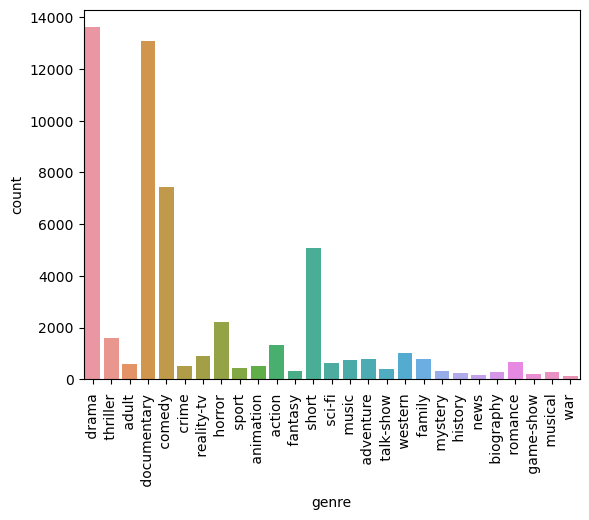

In [10]:
sns.countplot(x=train_data['genre'])
plt.xticks(rotation='vertical')
plt.show()

## countplot on genre of test data

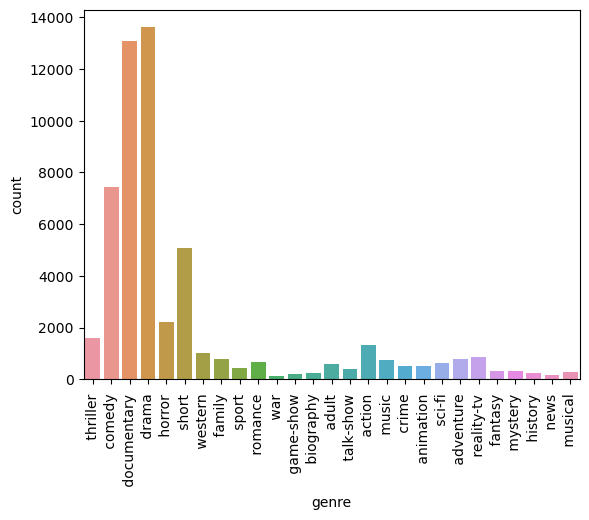

In [11]:
sns.countplot(x=test_data['genre'])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemer = PorterStemmer()

In [13]:
def clean_text(text):
    text = text.lower() # converting the text into lower case
    
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # removing special character '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' and http links
    
    words = text.split() # spliting the text with space and convert into list
    
    text = ' '.join([word for word in words if word not in stopwords.words('english')])
    # removing the stopword from the text like 'the , in, to ,are ,for, etc.'
    
    # applying lemmatization to the text 
    # e.g  jump = jump
    #      jumped = jump
    #      jumping = jump
    
    words = text.split() # again spliting the text with space and convert into list
    text = ' '.join([stemer.stem(word) for word in words])
    
    return text.strip()

In [14]:
clean_text(train_data['description'][0])

'listen convers doctor parent 10yearold oscar learn nobodi courag tell week live furiou refus speak anyon except straighttalk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [15]:
train_data['Description'] = train_data['description'].apply(lambda x: clean_text(x))

In [16]:
test_data['Description'] = test_data['description'].apply(lambda x: clean_text(x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [18]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=200000)

In [19]:
x_train_text = text_transformer.fit_transform(train_data['Description'])

In [20]:
x_test_text = text_transformer.transform(test_data['Description'])

In [21]:
y = train_data['genre']

In [22]:
y_test = test_data['genre']

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_clf = LogisticRegression(multi_class='ovr')
log_clf.fit(x_train_text,y)

LogisticRegression(multi_class='ovr')

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
y_pred = log_clf.predict(x_test_text)
accuracy_score(y_test,y_pred)

0.5781180811808118

In [27]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

      action        0.54      0.21      0.30      1314
       adult        0.63      0.18      0.29       590
   adventure        0.77      0.13      0.22       775
   animation        0.33      0.01      0.02       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.56      0.55      7446
       crime        0.50      0.02      0.03       505
 documentary        0.64      0.88      0.74     13096
       drama        0.52      0.81      0.63     13612
      family        0.66      0.05      0.09       783
     fantasy        0.50      0.01      0.01       322
   game-show        0.92      0.47      0.62       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.55      0.60      2204
       music        0.70      0.34      0.46       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

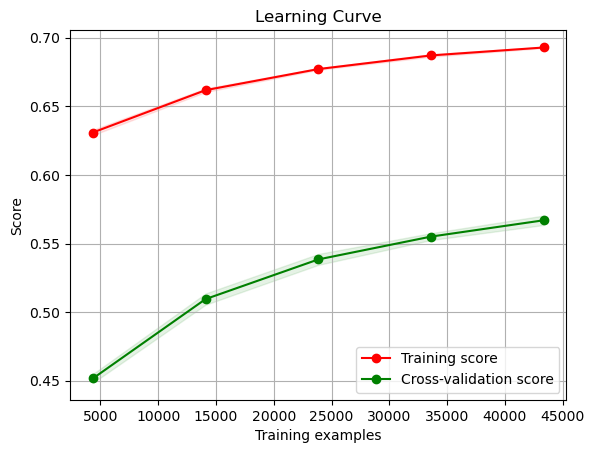

In [28]:
skplt.estimators.plot_learning_curve(log_clf,x_train_text,y)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

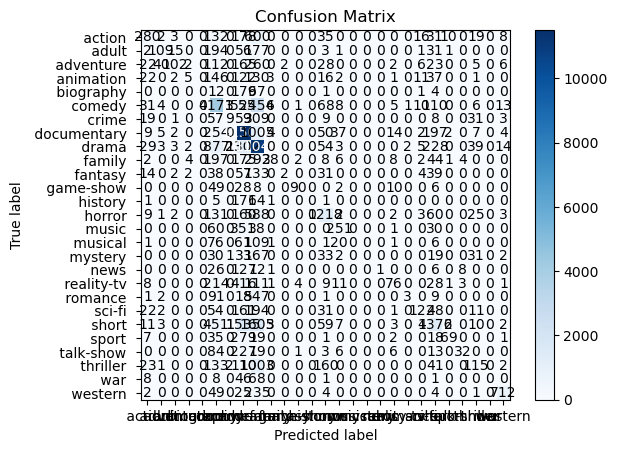

In [29]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

In [30]:
from sklearn.svm import SVC

In [31]:
svm = SVC()
svm.fit(x_train_text,y)
y_pred = svm.predict(x_test_text)
accuracy_score(y_test,y_pred)

0.5735977859778598